# Введение в анализ данных


In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib import animation as animation

sns.set(font_scale=1.6, palette='summer')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Легкая часть

### Задача 1.

Визуализируем *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Убедимся в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируем 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитаем сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитаем величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [2]:
size = 10
samples = sps.expon(loc=0, scale=1).rvs(size=size)
samples

array([1.87819311e-01, 4.83627035e-01, 8.21711607e-01, 9.52204126e-01,
       3.58442178e-01, 5.41567426e-02, 1.06967987e-03, 1.92361493e+00,
       1.89628457e+00, 2.35113270e+00])

In [3]:
# Генерирование набора случайных величин из конкретного распределения distr
def gen_array(ksi_cnt, n, distr):
  samples = distr(size=(ksi_cnt, n))
  return samples

# Подсчет кумулятивных значений и величины Z_jn
def gen_cumul_array(ksi_cnt, n, samples):
  mean = samples.mean()
  std = samples.std()
  
  z_array = (samples.cumsum(axis=1) - (np.arange(n) + 1) * mean) / (std * np.sqrt(np.arange(n) + 1))

  return z_array

Для каждого $j$ нанесем на один график зависимость $Z_{jn}$ от $n$.

In [4]:
def draw_distr(z_array, title):

  # decor
  colour = "navy"
  xlabel = 'Кол-во случайных величин'
  ylabel = 'Значение $Z_{jn}$'
  title_fnt = 26
  labels_fnt = 20

  # plot
  chart = plt.figure(figsize=(14, 6))
  ax = chart.add_axes([0,0,1,1])
  ax.grid(True)
  ax.set_title('Зависимость средней величины Z от n для {} распределения'.format(title), fontsize = title_fnt)
  ax.set_xlabel(xlabel, fontsize = labels_fnt)
  ax.set_ylabel(ylabel, fontsize = labels_fnt)
  for i in range(z_array.shape[0]):
    plt.plot(np.arange(z_array.shape[1]), z_array[i], color = colour, alpha = 0.05)
  plt.xlim((0, z_array.shape[1]))

  plt.show()

In [5]:
def draw_hist(z_array, title):

  # decor
  colours = ["navy", "darkorange"]
  xlabel = 'Значение среднего'
  ylabel = 'Плотность'
  title_fnt = 26
  labels_fnt = 20

  # hist
  chart = plt.figure(figsize=(14, 6))
  ax = chart.add_axes([0,0,1,1])
  ax.grid(True)
  ax.set_title('Иллюстрация ЦПТ: {} распределение'.format(title), fontsize = title_fnt)
  ax.set_xlabel(xlabel, fontsize = labels_fnt)
  ax.set_ylabel(ylabel, fontsize = labels_fnt)

  grid = np.meshgrid(np.linspace(-3, 3, 500))
  plt.hist(z_array.T[z_array.shape[1] - 1], bins=25, density=True,
           color=colours[0], alpha=0.75, label = 'Гистограмма выборки')
  plt.plot(grid[0],
           sps.norm.pdf(grid[0], loc = 0, scale = 1),
           color = colours[1],
           linewidth = 3.0,
           label = 'Плотность $\mathcal{N}(0,1)$')

  plt.legend(fontsize = labels_fnt)

  plt.show()

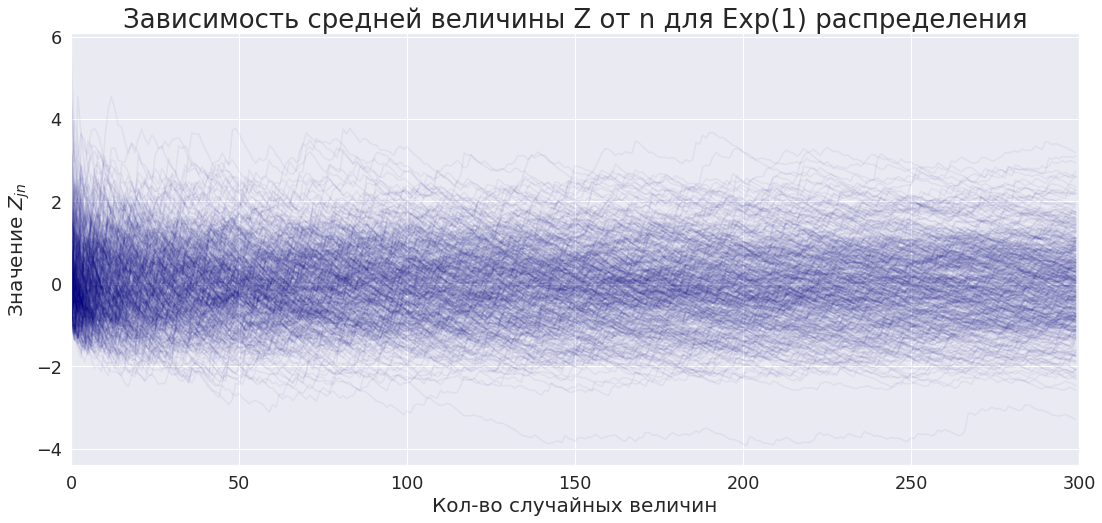

In [6]:
Z = gen_cumul_array(500, 300, gen_array(ksi_cnt=500, n=300, distr=sps.expon(loc=0, scale=1).rvs))
draw_distr(Z, 'Exp(1)')

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ построим гистограмму и проверим, похожа ли она на плотность распределения $\mathcal{N}(0, 1)$.

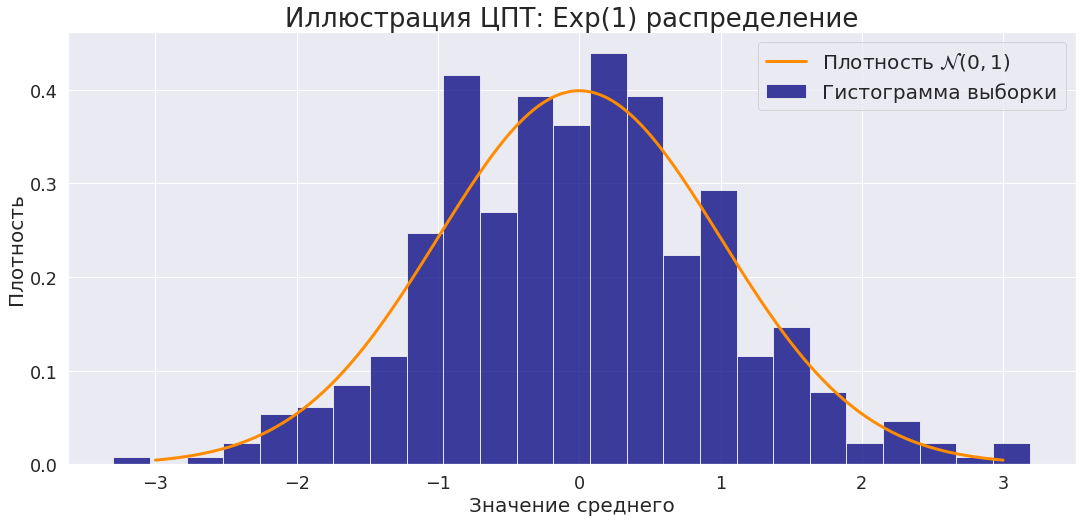

In [7]:
draw_hist(Z, 'Exp(1)')

Значения $Z_{jn}$ не сходятся к какой-либо константе. Построенная гистограмма похожа на плотность распределения $\mathcal{N}(0, 1)$.

Так, нарисованные график и гистограмма иллюстрируют ЦПТ: наличие сходимости к $\mathcal{N}(0,1)$ подтверждено, к константе опровержено.

**b).** Выполним те же действия для распределений $U(0, 1)$ и $Poiss(1)$.

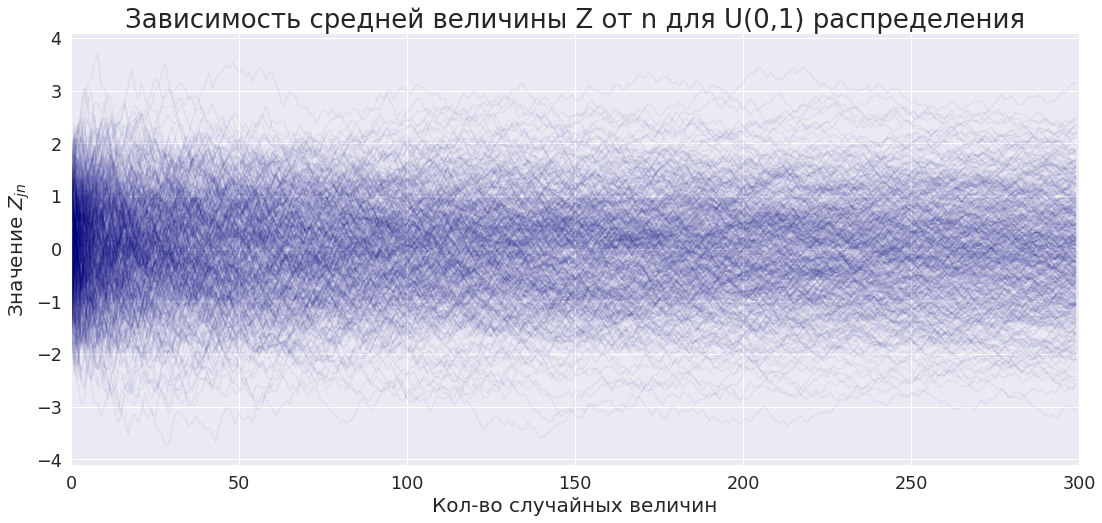

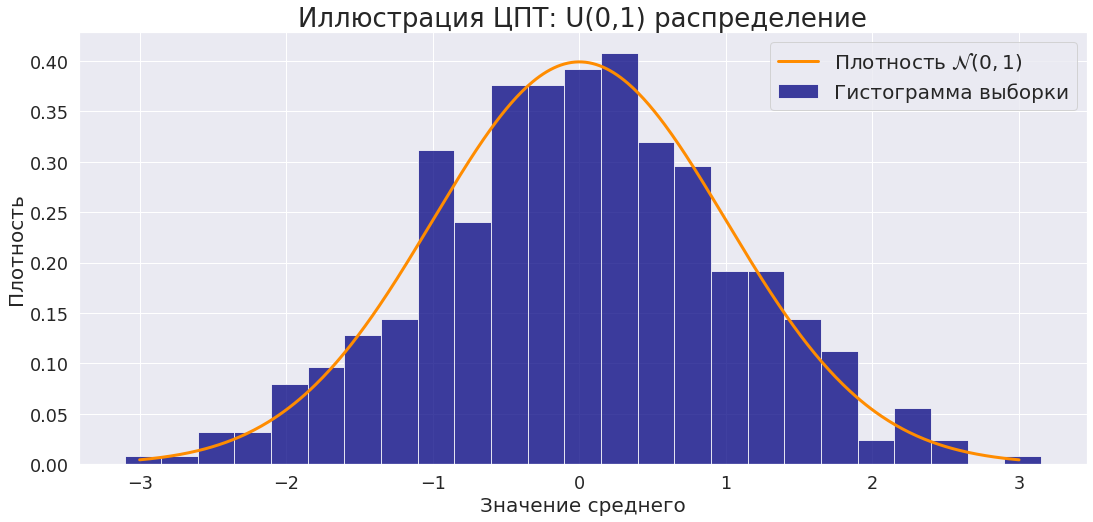

In [8]:
Z = gen_cumul_array(500, 300, gen_array(ksi_cnt=500, n=300, distr=sps.uniform(loc=0, scale=1).rvs))
draw_distr(Z, 'U(0,1)')
draw_hist(Z, 'U(0,1)')

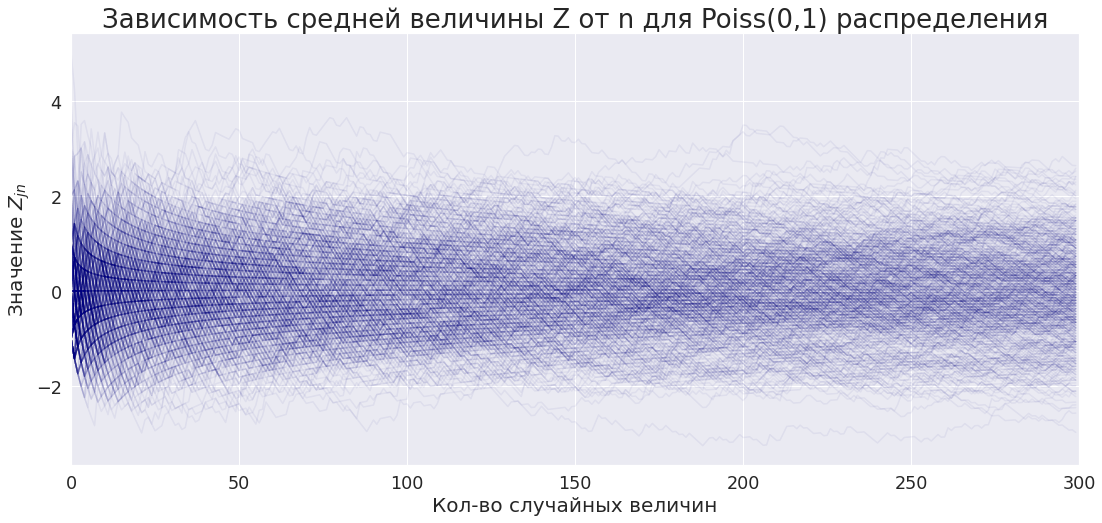

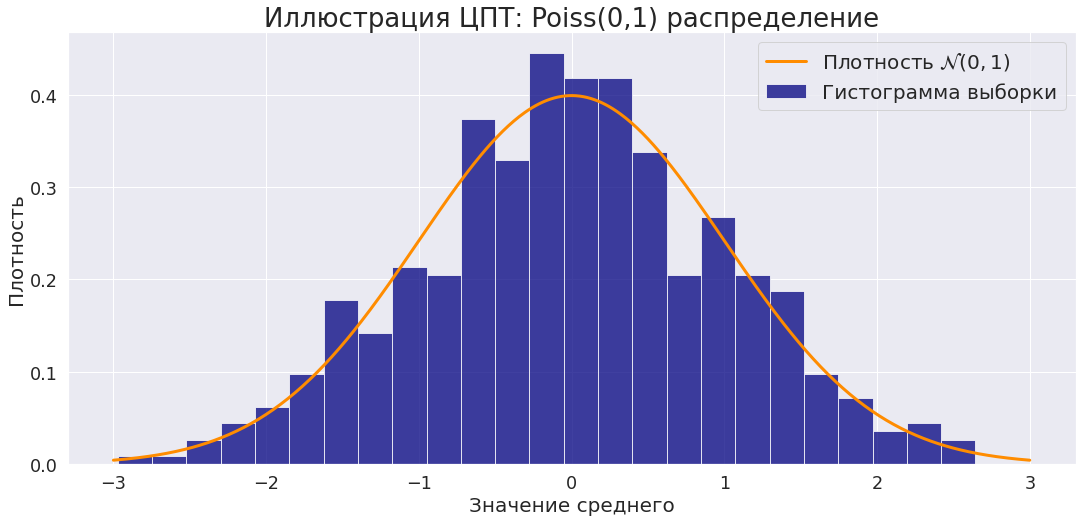

In [ ]:
Z = gen_cumul_array(500, 300, gen_array(ksi_cnt=500, n=300, distr=sps.poisson(mu=1).rvs))
draw_distr(Z, 'Poiss(0,1)')
draw_hist(Z, 'Poiss(0,1)')

*Вывод:* Новые графики, как и первые два, подтверждают смысл ЦПТ.

Данные эксперименты (внимание на гистограммы) подтверждают, что последовательность $Z_n$ (центрированных нормированных сумм случайных величин одинакового распределения) имеют распределение, близкое к стандартному нормальному.


## Сложная часть

### Задача 2.

Визуализируем *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Bern(1/2)$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Убедимся в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируем 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитаем среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [9]:
samples = (sps.bernoulli(p = 0.5).rvs(size=(500, 300)) - 0.5) * 2
cumul_array = samples.cumsum(axis=1)

Для каждого $j$ нанесем на один график зависимость $S_{jn}$ от $n$.

No handles with labels found to put in legend.


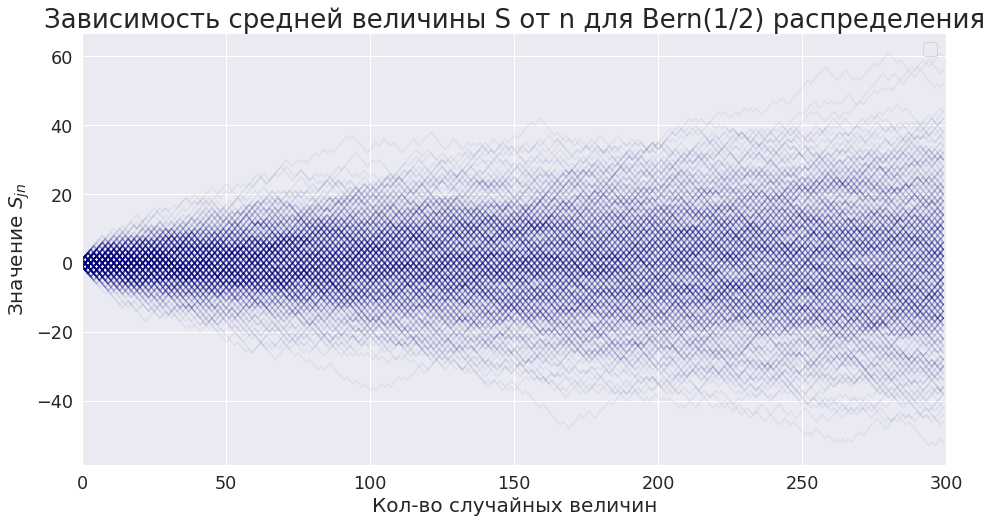

In [10]:
def draw_distr(s_array, title):

  # decor
  colours = ["navy", "darkorange"]
  xlabel = 'Кол-во случайных величин'
  ylabel = 'Значение $S_{jn}$'
  title_fnt = 26
  labels_fnt = 20

  # plot
  chart = plt.figure(figsize=(12, 6))
  ax = chart.add_axes([0,0,1,1])
  ax.grid(True)
  ax.set_title('Зависимость средней величины S от n для {} распределения'.format(title), fontsize = title_fnt)
  ax.set_xlabel(xlabel, fontsize = labels_fnt)
  ax.set_ylabel(ylabel, fontsize = labels_fnt)
  for i in range(s_array.shape[0]):
    plt.plot(np.arange(s_array.shape[1]), s_array[i], color = colours[0], alpha = 0.05)

  plt.xlim((0, s_array.shape[1]))

  plt.legend()
  plt.show()

draw_distr(cumul_array, 'Bern(1/2)')

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ построим график доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5.

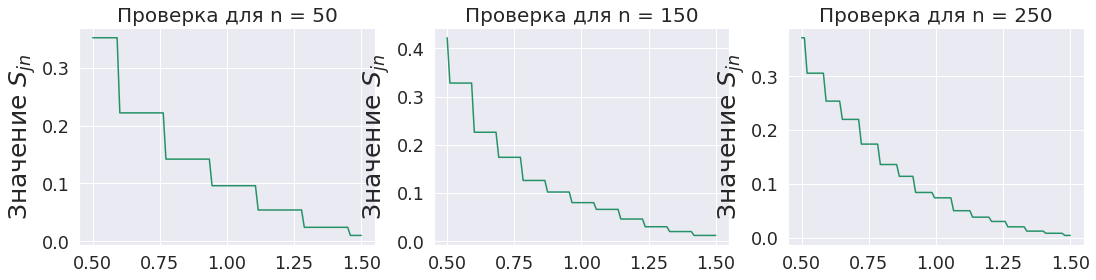

In [15]:
# decor
colours = ["navy", "darkorange"]
# xlabel = 'Кол-во случайных величин'
ylabel = 'Значение $S_{jn}$'
title_fnt = 20
labels_fnt = 25

# plot
plt.figure(figsize=(18,4))
list_n = [50, 150, 250]

for n, i in zip(list_n, range(1,4)):
  plt.subplot(1, 3, i)
  cur_array = cumul_array.T[n - 1]
  S_in = cumul_array[:, n]

  x = np.linspace(0.5, 1.5, 100)
  y = np.array(list(map(lambda c_j: (abs(S_in) > c_j * ((2 * n * np.log(np.log(n))) ** 0.5)).sum(), x))) / 500

  plt.plot(x, y)

  # plt.xlabel(xlabel, fontsize = labels_fnt)
  plt.ylabel(ylabel, fontsize = labels_fnt)
  plt.title('Проверка для n = {}'.format(n), fontsize = title_fnt)

plt.show()

*Вывод:* закон повторного логарифма указывает на то, что при увеличении кол-ва рассматриваемых шагов вероятность выхода за границы, описанные законом, уменьшаются.

---
### Задача 3.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Будем анализировать впечатление первокурсников после посвята, а именно — взаимосвязь между тем, какие оценки они поставили каждому из "этапов" данного мероприятия (официальная часть, сюрприз и дискотека) и то, какой вид деятельности они оценили, как наиболее понравившийся (готовить номер с группой и репетировать его, выступать с группой, смотреть на номера других групп...)

*Гипотеза:* Дискотека и мероприятие-сюрприз после официальной части посвята должно было понравиться более общительным ребятам — тем, кому понравилось готовить номер со своей группой. В то же время смотреть посвят наверняка больше понравилось тем, кто отметил, что ему больше всего понравилось смотреть на номера других участников.

In [19]:
data = pd.read_excel('./Посвят ФПМИ_Индустрия 2019 (Ответы).xlsx')
data = data.iloc[:, 0:4]
data.columns = ['Оф. часть', 'Сюрприз', 'Дискотека', 'Любимая активность']
data.head()

,Оф. часть,Сюрприз,Дискотека,Любимая активность
0,5,5,5,Выступать с группой
1,5,Не принимал в этом участия,Не посещал дискотеку,Смотреть на номера других групп
2,4,Не принимал в этом участия,Не посещал дискотеку,Смотреть на номера других групп
3,5,5,Не посещал дискотеку,Готовить номер (встречи с группой + репетиции)
4,5,Не принимал в этом участия,Не посещал дискотеку,Выступать с группой


Посмотрим, что больше понравилось студентом, высоко оценившим оф. часть:

In [20]:
data1 = data[data['Оф. часть'] == 5]
data2 = data[data['Сюрприз'] == 5]
data3 = data[data['Дискотека'] == 5]
data1.head()

,Оф. часть,Сюрприз,Дискотека,Любимая активность
0,5,5,5,Выступать с группой
1,5,Не принимал в этом участия,Не посещал дискотеку,Смотреть на номера других групп
3,5,5,Не посещал дискотеку,Готовить номер (встречи с группой + репетиции)
4,5,Не принимал в этом участия,Не посещал дискотеку,Выступать с группой
5,5,5,3,Выступать с группой


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


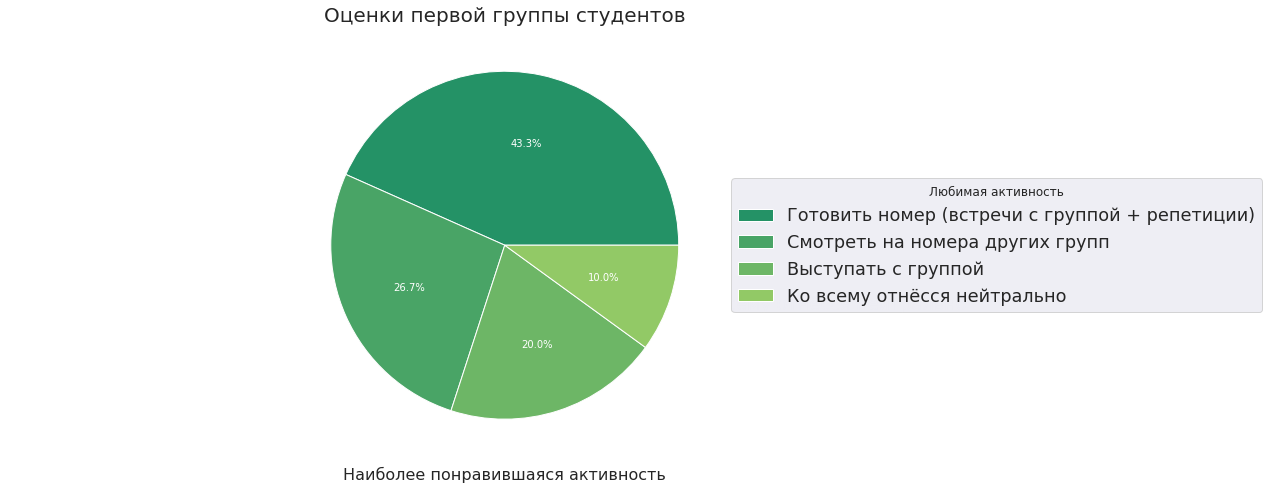

In [21]:
def draw_diagram1(data_):
  # decor
  title = 'Оценки первой группы студентов'
  label_x = 'Наиболее понравившаяся активность'
  font_sizes = [20, 16]

  #data
  data_['num'] = 1
  data_ = data_.groupby('Любимая активность').count().sort_values('num', ascending=False).reset_index()
  percents = (data_['num'] / data_['num'].sum())
  percents.sort_values(ascending = False, inplace=True)

  #plot
  plt.figure(figsize=(16, 8));
  wedges, texts, autotexts = plt.pie(percents, labels=data_['Любимая активность'], autopct='%1.1f%%', textprops=dict(color="white"))
  plt.title(title, fontsize=font_sizes[0])
  plt.xlabel(label_x, fontsize=font_sizes[1])
  plt.legend(wedges, data_['Любимая активность'], title='Любимая активность', 
             loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

draw_diagram1(data1)

Проделаем то же самое с ребятами из других групп (кому понравился сюрприз и дискотека соответственно)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


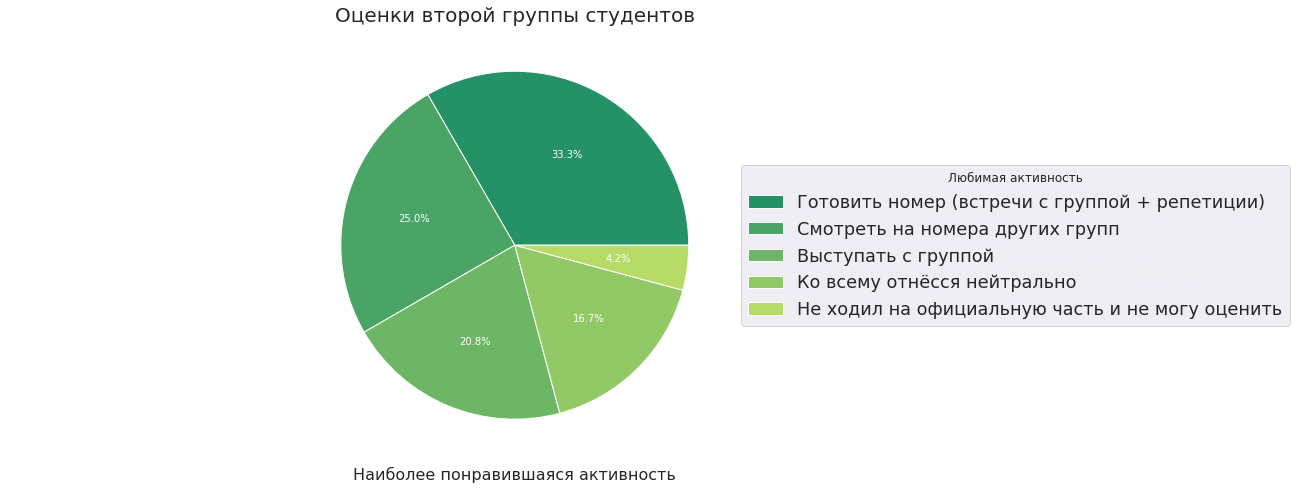

In [22]:
def draw_diagram1(data_):
  # decor
  title = 'Оценки второй группы студентов'
  label_x = 'Наиболее понравившаяся активность'
  font_sizes = [20, 16]

  #data
  data_['num'] = 1
  data_ = data_.groupby('Любимая активность').count().sort_values('num', ascending=False).reset_index()
  percents = (data_['num'] / data_['num'].sum())
  percents.sort_values(ascending = False, inplace=True)

  #plot
  plt.figure(figsize=(16, 8));
  wedges, texts, autotexts = plt.pie(percents, labels=data_['Любимая активность'], autopct='%1.1f%%', textprops=dict(color="white"))
  plt.title(title, fontsize=font_sizes[0])
  plt.xlabel(label_x, fontsize=font_sizes[1])
  plt.legend(wedges, data_['Любимая активность'], title='Любимая активность', 
             loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

draw_diagram1(data2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


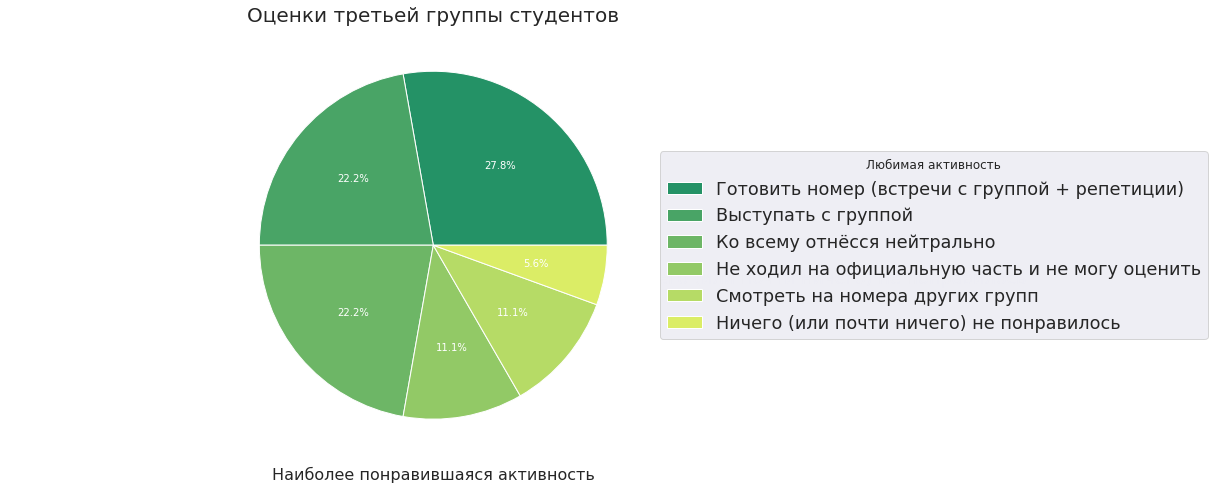

In [23]:
def draw_diagram1(data_):
  # decor
  title = 'Оценки третьей группы студентов'
  label_x = 'Наиболее понравившаяся активность'
  font_sizes = [20, 16]

  #data
  data_['num'] = 1
  data_ = data_.groupby('Любимая активность').count().sort_values('num', ascending=False).reset_index()
  percents = (data_['num'] / data_['num'].sum())
  percents.sort_values(ascending = False, inplace=True)

  #plot
  plt.figure(figsize=(16, 8));
  wedges, texts, autotexts = plt.pie(percents, labels=data_['Любимая активность'], autopct='%1.1f%%', textprops=dict(color="white"))
  plt.title(title, fontsize=font_sizes[0])
  plt.xlabel(label_x, fontsize=font_sizes[1])
  plt.legend(wedges, data_['Любимая активность'], title='Любимая активность', 
             loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

draw_diagram1(data3)

*Промежуточный вывод:* исходная гипотеза подтвердилась частично: ребятам, которым понравилась дискотека, больше всего понравилось готовить номер со своей группой и посещать репетиции, но это справедливо и для группы первокурсников, которые оценили официальную часть на 5.

А что если первокурсники не хотели обижать организаторов и проставили всем мероприятиям 5? Проверим, может, среди тех, кто поставил 5 только оф. части, в приоритете был именно просмотр номеров других групп.

In [24]:
data4 = data1[data['Дискотека'] != 5]
data4 = data4[data['Сюрприз'] != 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


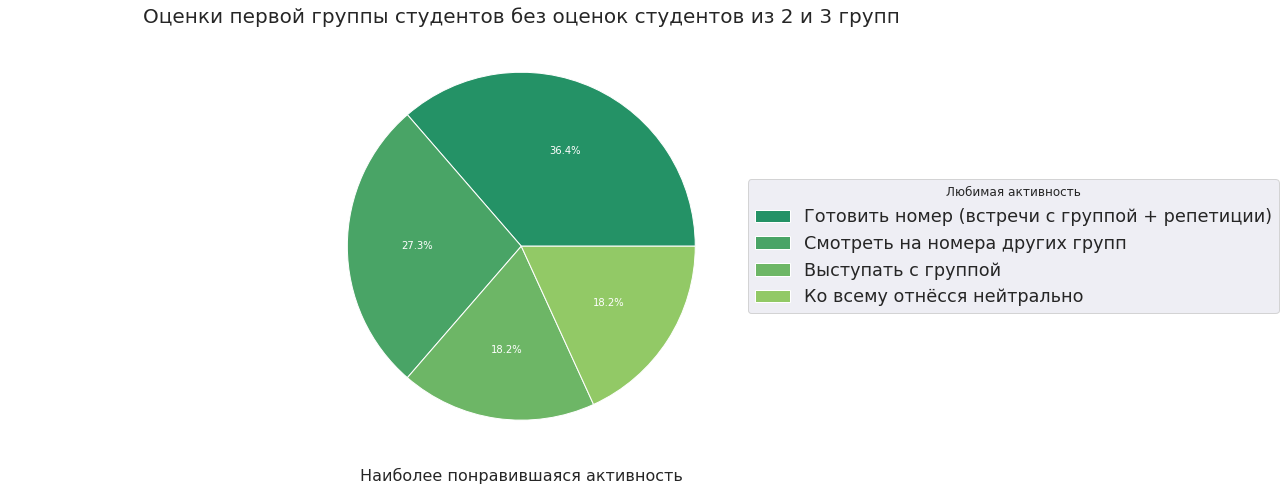

In [25]:
def draw_diagram1(data_):
  # decor
  title = 'Оценки первой группы студентов без оценок студентов из 2 и 3 групп'
  label_x = 'Наиболее понравившаяся активность'
  font_sizes = [20, 16]

  #data
  data_['num'] = 1
  data_ = data_.groupby('Любимая активность').count().sort_values('num', ascending=False).reset_index()
  percents = (data_['num'] / data_['num'].sum())
  percents.sort_values(ascending = False, inplace=True)

  #plot
  plt.figure(figsize=(16, 8));
  wedges, texts, autotexts = plt.pie(percents, labels=data_['Любимая активность'], autopct='%1.1f%%', textprops=dict(color="white"))
  plt.title(title, fontsize=font_sizes[0])
  plt.xlabel(label_x, fontsize=font_sizes[1])
  plt.legend(wedges, data_['Любимая активность'], title='Любимая активность', 
             loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

draw_diagram1(data4)

Посмотрим, какие тенденции в целом наблюдаются в группе проголосовавших студентов:

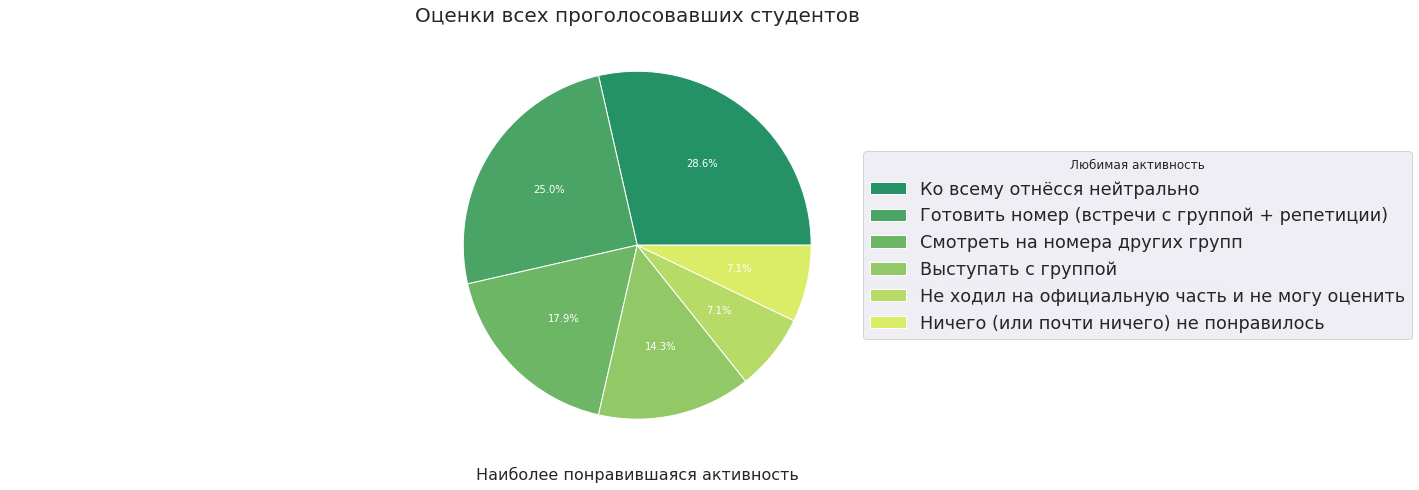

In [26]:
def draw_diagram1(data_):
  # decor
  title = 'Оценки всех проголосовавших студентов'
  label_x = 'Наиболее понравившаяся активность'
  font_sizes = [20, 16]

  #data
  data_['num'] = 1
  data_ = data_.groupby('Любимая активность').count().sort_values('num', ascending=False).reset_index()
  percents = (data_['num'] / data_['num'].sum())
  percents.sort_values(ascending = False, inplace=True)

  #plot
  plt.figure(figsize=(16, 8));
  wedges, texts, autotexts = plt.pie(percents, labels=data_['Любимая активность'], autopct='%1.1f%%', textprops=dict(color="white"))
  plt.title(title, fontsize=font_sizes[0])
  plt.xlabel(label_x, fontsize=font_sizes[1])
  plt.legend(wedges, data_['Любимая активность'], title='Любимая активность', 
             loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

draw_diagram1(data)

*Итог:* вторая часть гипотезы с треском провалилась — всем группам студентов (высоко оценившим каждое из составляющих посвята) больше всего понравилось готовить номер с группой и общаться с одногруппниками на репетициях. 

*Paradoxically, на репетиции, казалось, народ ходил достаточно неохотно...*

Так, данный анализ взаимосвязи наиболее понравившейся активности и наиболее понравившегося этапа посвята показал, что любимой активностью являлись репетиции номера группы.

В то же время в первой и второй группах (посвят и сюрприз) топ активностей совпадает:

1.   Готовить номер
2.   Смотреть на номера других
3.   Выступать с группой

А у любителей дискотеки приоритеты оказались несколько иными:

1.   Готовить номер
2.   Выступать с группой
3.   Нейтрально отнеслись ко всему

В этой категории просмотр номеров других групп занимает второе место с конца.

А просмотр общих тенденций же показал, что добрая часть ребят ставила '5' нескольким этапам посвята, а потому затесались в разные группы и вывели там подготовку номера на топ-1 (активные и общительные ребята, не желающие расстраивать организаторов). Но на самом деле большая часть первокурсников ответила, что достаточно нейтрально отнеслась ко всем мероприятиям.

Но на будущее стоит задуматься о том, что почти 15% студентов не посещали данное мероприятие или же оценили его качество достаточно низко.

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь проанализируем данные о посещаемости самостоятельно.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим.
2. Нужно описать, какими общими характеристиками обладают спамовые записи и как часто они происходят.

#### Step 1
Загрузим данные, полученные из имеющихся форм с лекций и извлечем список студентов из таблицы с оценками по курсу анализа данных.

Предварительно в списке студентов оставим только номер группы (без школы), в списках посещений и списке студентов строки сделаем нижнего регистра.

In [27]:
march5 = pd.read_excel('./Лекция 5 марта.xlsx')
april30 = pd.read_excel('./Лекция 30 апреля.xlsx')
students_list = pd.read_excel('./Введение в АД.xlsx')

for i in range(len(students_list['Группа'])):
  if students_list['Группа'][i] in range(1,20):
    students_list['Группа'][i] = students_list['Группа'][i - 1]
students_list.dropna(subset=['ФИО'], inplace=True)
group = []
for i in range(len(students_list['Группа'])):
  group.append(str(students_list.iloc[i, 0])[4:7])
  students_list.iloc[i, 1] = students_list.iloc[i, 1].lower().strip()
students_list['Группа'] = group

students_list.dropna(inplace=True)
students_list.head()

,Группа,ФИО
1,811,айгожиев бахтияр
2,811,булыгин артем константинович
3,811,кашин кирилл олегович
4,811,кухтенков алексей сергеевич
5,811,максименко александр евгеньевич


In [28]:
for i in range(len(march5['Фамилия Имя'])):
  march5.iloc[i, 2] = march5.iloc[i, 2].lower().strip()
  march5.iloc[i, 1] = str(march5.iloc[i, 1]).lower().strip()
  april30.iloc[i, 1] = str(april30.iloc[i, 1]).replace('Б05-', '').lower().strip()
march5.head()

,Отметка времени,Группа,Фамилия Имя,ifCorrect
0,2020-03-05 19:19:05.831,811.0,агапов парфений,False
1,2020-03-05 19:18:37.374,811.0,айгожиев бахтияр,True
2,2020-03-05 19:20:07.941,811.0,беспалов каллистрат,False
3,2020-03-05 19:20:38.163,811.0,блинов епифаний,False
4,2020-03-05 19:20:06.321,811.0,блохин измарагд,False


In [29]:
for i in range(len(april30['ФИО'])):
  april30.iloc[i, 1] = str(april30.iloc[i, 1]).lower().strip()
  april30.iloc[i, 2] = str(april30.iloc[i, 2]).replace('Б05-', '')
april30.head()

,Отметка времени,ФИО,Группа,ifCorrect
0,2020-04-30 19:50:15.414,редкозубов вадим витальевич,"""Стекловата""",False
1,2020-04-30 19:26:08.660,редкозубов вадим витальевич,1 отрицательная,False
2,2020-04-30 19:26:00.736,редкозубов вадим витальевич,1 положительная,False
3,2020-04-30 19:26:23.343,редкозубов вадим витальевич,2 отрицательная,False
4,2020-04-30 19:26:15.992,редкозубов вадим витальевич,2 положительная,False


#### Step 2

Итак, теперь у нас есть удобный для сверки список ФИО и немного различающиеся таблицы за 5 марта и 30 апреля. Главное различие — представление имени (Фамилия Имя и ФИО).

*Примечание:* при нахождении в нашем понимании корректных строк можно отмечать в списке студентов, были ли они отмечены на той или иной лекции.



In [30]:
# students_list['march5_presence'] = 0
# students_list['april30_presence'] = 0
students_list.dropna(inplace=True)
students_fi = []

for i in range(students_list.shape[0]):
  fio = str(students_list.iloc[i, 1]).split(' ')
  surname_name = fio[0] + " " + fio[1]
  students_fi.append(surname_name)

students_list['ФИ'] = students_fi

march5.sort_values(by=['Группа', 'Фамилия Имя'], inplace=True)
april30.sort_values(by=['Группа', 'ФИО'], inplace=True)

students_list.dropna(inplace=True)
students_list

,Группа,ФИО,ФИ
1,811,айгожиев бахтияр,айгожиев бахтияр
2,811,булыгин артем константинович,булыгин артем
3,811,кашин кирилл олегович,кашин кирилл
4,811,кухтенков алексей сергеевич,кухтенков алексей
5,811,максименко александр евгеньевич,максименко александр
...,...,...,...
188,831,точилин владимир николаевич,точилин владимир
189,831,хайруллин асхат зиннурович,хайруллин асхат
190,831,шитиков олег михайлович,шитиков олег
192,,антоненко мария,антоненко мария


##### Step 2.1

Отметим в мартовской таблице корректные строки: полностью совпадающие со списком студентов (повторы отметим, как 'Duplicate')

In [31]:
march_unique = march5.loc[:, 'Группа' : 'Фамилия Имя'].drop_duplicates()

march_correct = pd.merge(students_list, march_unique, how='inner', left_on='ФИ', right_on = 'Фамилия Имя')
march_correct['march5_presence'] = 1

march_correct = march_correct[march_correct['Группа_x'] == march_correct['Группа_y']]

march5['ifCorrect'] = False
march5.loc[:, 'ifCorrect'] = march5['Фамилия Имя'].isin(march_correct['ФИ'])
march5.sort_values(by=['Группа', 'Фамилия Имя'])


# Отметим повторные записи значением 'Duplicate'
for i in range(1, len(march5.index)):
  if (march5.loc[march5.index[i], 'Фамилия Имя'] == march5.loc[march5.index[i - 1], 'Фамилия Имя']) and \
    (march5.loc[march5.index[i], 'Группа'] == march5.loc[march5.index[i - 1], 'Группа']):
    march5.loc[march5.index[i], 'ifCorrect'] = 'Duplicate'
  
march5.groupby('ifCorrect').count()['Группа']

ifCorrect
False        820
Duplicate      9
Name: Группа, dtype: int64

##### Step 2.2

Отметим в апрельской таблице корректные строки: полностью совпадающие со списком студентов (повторы отметим, как 'Duplicate')

У некоторых иностранцев нет отчества, потому будем проверять и по ФИО, и по ФИ.

In [32]:
april_unique = april30.loc[:, 'ФИО' : 'Группа'].drop_duplicates()

april_correct = pd.merge(students_list, april_unique, how='inner', left_on='ФИО', right_on = 'ФИО')
april_correct['april30_presence'] = 1

april_correct = april_correct[april_correct['Группа_x'] == april_correct['Группа_y']]

april30['ifCorrect'] = False
ifCorrect1 = april30['ФИО'].isin(april_correct['ФИО']).tolist()
ifCorrect2 = april30['ФИО'].isin(april_correct['ФИ']).tolist()

for i in range(len(ifCorrect1)):
  ifCorrect1[i] = ifCorrect1[i] or ifCorrect2[i]

april30['ifCorrect'] = ifCorrect1
april30.sort_values(by=['Группа', 'ФИО'])


# Отметим повторные записи значением 'Duplicate'
for i in range(1, len(april30.index)):
  if (april30.loc[april30.index[i], 'ФИО'] == april30.loc[april30.index[i - 1], 'ФИО']) and \
    (april30.loc[april30.index[i], 'Группа'] == april30.loc[april30.index[i - 1], 'Группа']):
    april30.loc[april30.index[i], 'ifCorrect'] = 'Duplicate'

april30.groupby('ifCorrect').count()['Группа']

ifCorrect
False        2328
True          116
Duplicate      21
Name: Группа, dtype: int64

#### Step 3

Посмотрим на то, что осталось...


##### Step 3.1

Рассмотрим уникальные значения групп:

In [33]:
march5[march5['ifCorrect'] == False]['Группа'].drop_duplicates()

0      811.0
66     812.0
131    813.0
192    814.0
262    821.0
331    822.0
406    823.0
483    824.0
555    825.0
622    826.0
669    827.0
752    831.0
824      nan
Name: Группа, dtype: object

In [34]:
march5[march5['ifCorrect'] == False][march5['Группа'] == 'другая']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Отметка времени,Группа,Фамилия Имя,ifCorrect


In [35]:
for i in range(1, len(march5.index)):
  if march5.loc[march5.index[i], 'Группа'] == 'другая' and march5.loc[march5.index[i], 'ifCorrect'] == False:
    march5.loc[march5.index[i], 'ifCorrect'] = True
    
march5.groupby('ifCorrect').count()['Группа']

ifCorrect
False        820
Duplicate      9
Name: Группа, dtype: int64

In [36]:
april30[april30['ifCorrect'] == False]['Группа'].drop_duplicates()

0          "Стекловата"
1       1 отрицательная
2       1 положительная
3       2 отрицательная
4       2 положительная
             ...       
2460         разрешимая
2461              риска
2462          свободная
2463     симметрическая
2464            хорошая
Name: Группа, Length: 87, dtype: object

In [37]:
april30[april30['Группа'] == 'другая']

,Отметка времени,ФИО,Группа,ifCorrect


*Промежуточный итог*: В марте стоит обратить внимание на людей с указанной группой "другая" — часть из них студенты (Антоненко Маша и Белоозерова Яна, которые есть в списке с оценками) — отметим записи с группой 'другая', как корректные.

К апрелю студенты разыгрались и спама немерено, но там уже нет студентов с группой 'другая'.

In [38]:
march5.to_csv('./lecture_5.03.csv', index=False, encoding='utf-8')
april30.to_csv('./lecture_30.04.csv', index=False, encoding='utf-8')

**Итог:** 


1.   В каждой строке в таблицах march5 и april30 в атрибуте 'ifCorrect' указано, является ли строка чем-то осмысленным:

True — строка корректна

Duplicate — в таблице есть аналогичная строка с другой временной меткой

False — в таблице с оценками не нашлось соответствия данной записи (потому, что в них опечатка или потому, что это спам)


2.   Общие характеристики спамовых записей:


*   Некорректные имена и номера групп (и те, и другие можно сверять по таблице с оценками + добавив преподавателей). Опечатки здесь отслеживать сложнее; можно, если очень хочется, считать редакционное расстояние, но в контексте посещений лекции такое усложнение кажется неуместным.
*   В случае возможности автоматического заполнения формы стоит смотреть, сколько схожих записей идут "разом" — с каким-то достаточно небольшим временным промежутком.
*   Большой объем дубликатов — пара одинаковых записей может возникнуть из-за неосторожности заполняющего форму, но не 30...

